# Introduction: Home Credit Default Risk Competition

이 노트에서는 현재 Kaggle에서 진행 중인 Home Credit 디폴트 리스크 머신러닝 대회를 처음 살펴보겠습니다.
이 대회의 목적은 과거 대출 신청 데이터를 사용하여 신청자가 대출금을 상환할 수 있는지 여부를 예측하는 것입니다.
이것은 standard supervised 분류 작업입니다.


- Supervised : 레이블은 교육 데이터에 포함되며 목표는 피쳐에서 레이블을 예측하는 방법을 배울 수 있도록 모형을 교육하는 것입니다.


- Classification: 레이블은 이진 변수입니다. 0(제시 대출 상환), 1(대출 상환에 어려움이 있음)



- application_train/application_test(신청): 홈 크레딧의 각 대출 애플리케이션에 대한 정보가 포함된 기본 교육 및 테스트 데이터입니다. 모든 대출은 자체 행이 있으며 SK_ID_CURR 기능으로 식별됩니다. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.


- bureau(사무실): 다른 금융 기관으로부터의 고객의 이전 신용에 관한 데이터입니다. 각 이전 크레딧에는 해당 국의 행이 있지만 응용 프로그램 데이터의 한 대출에는 이전 크레딧이 여러 개 있을 수 있습니다.


- bure_balance: bureau의 이전 크레딧에 대한 월별 데이터입니다. 각 행은 이전 신용도의 한 달이며, 이전 신용도의 한 행은 신용 기간의 한 달에 하나씩 여러 행을 가질 수 있습니다.


- 이전_신청: 신청 데이터에 대출을 받은 고객의 홈 크레딧에서 대출을 위한 이전 신청입니다. 애플리케이션 데이터의 각 유동 대출은 이전 대출을 여러 개 가질 수 있습니다. 각 이전 응용 프로그램에는 행이 하나씩 있으며 SK_ID_PREV 기능으로 식별됩니다.


- POS_CASH_BALANCE(대출): 고객이 홈 크레딧을 통해 이전 판매 시점 또는 현금 대출에 대한 월별 데이터입니다. 각 행은 이전 판매 시점 또는 현금 대출의 한 달이며, 하나의 이전 대출은 여러 행을 가질 수 있습니다.


- credit_card_balance(신용카드): 고객이 홈 크레딧과 함께 사용한 이전 신용카드에 대한 월별 데이터입니다. 각 행은 신용카드 잔액의 한 달이며, 하나의 신용카드에는 여러 행이 있을 수 있습니다.


- 할부_지급(할부): 홈 크레딧에서 이전 대출에 대한 지급 내역입니다. 결제를 할 때마다 한 줄이 있고 결제를 놓칠 때마다 한 줄이 있습니다.

# Imports

We are using a typical data science stack: numpy, pandas, sklearn, matplotlib.


In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Read in Data

먼저, 우리는 사용 가능한 모든 데이터 파일을 불러올 수 있습니다. 
train용 메인 파일 1개(target 포함), test용 메인 파일 1개(target 없음), 예제 제출 파일 1개, 각 대여에 대한 추가 정보가 포함된 기타 파일 6개 등 총 9개의 파일이 있습니다.


In [4]:
# List files available
print(os.listdir("./input/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [6]:
# Training data
app_train = pd.read_csv('./input/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


train 데이터에는 307511개의 관측치(각 관측치는 별도의 대출)와 <br>
target(예측하려는 레이블)을 포함하여 122개의 형상(변수)이 있습니다.

In [7]:
# Testing data features
app_test = pd.read_csv('./input/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The test set is considerably smaller and lacks a TARGET column.



# Exploratory Data Analysis

탐색적 데이터 분석(EDA)은 통계를 계산하고 데이터 내의 추세, 이상 징후, 패턴 또는 관계를 찾기 위해 수치를 작성하는 개방형 프로세스입니다.<br>
EDA의 목표는 데이터가 무엇을 알려줄 수 있는지 알아내는 것입니다. <br>
일반적으로 개괄적인 개요로 시작한 다음 데이터에서 흥미로운 영역을 발견하면 특정 영역으로 좁혀집니다. <br>
이 결과는 그 자체로 흥미로운 것일 수도 있고, 사용할 기능을 결정하거나 모델 선택에 사용될 수도 있습니다.



## Examine the Distribution of the Target Column 

target = 우리가 예측해야 하는 것 : 0은 대출에 대한 제때 상환되었거나, 1은 고객이 지불에 어려움을 겪고 있음을 나타냅니다. <br>
우리는 먼저 각 범주에 속하는 대출의 수를 살펴볼 수 있습니다.



In [9]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

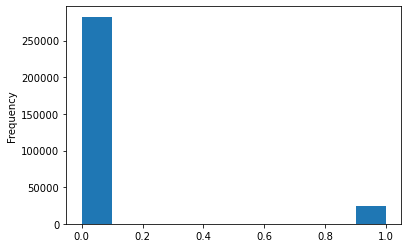

In [10]:
app_train['TARGET'].astype(int).plot.hist();

이 정보를 통해 우리는 이것이 불균형적인 계급 문제임을 알 수 있습니다. <br>
제때 상환한 대출이 갚지 않은 대출보다 훨씬 많습니다.<br>
우리가 좀 더 정교한 기계 학습 모델에 들어가면, 우리는 이러한 불균형을 반영하기 위해 데이터에서의 표현에 따라 수업의 가중치를 매길 수 있습니다.


## Examine Missing Values

다음으로 각 열에 있는 결측값의 수와 백분율을 살펴볼 수 있습니다.


In [12]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


머신러닝 모델을 구축해야 할 때가 되면 이러한 결측값( imputation이라고 함)을 채워야 합니다. <br>
이후 작업에서는  imputation 없이 결측값을 처리할 수 있는 XGBoost와 같은 모델을 사용할 예정입니다.<br>
결측값 비율이 높은 열을 삭제하는 방법도 있지만, 결측값이 모형에 도움이 될지는 미리 알 수 없습니다.<br>
따라서 우리는 당분간 모든 컬럼을 유지할 것입니다.

# Column Types

각 데이터 유형의 열 수를 살펴보겠습니다. <br>
int64 및 float64는 숫자 변수(불연속 또는 연속형)입니다.<br> 
object 열에는 문자열이 포함되어 있으며 범주형 피쳐입니다.


In [14]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

이제 각 객체(범주형) 열에 있는 고유한 항목 수를 살펴보겠습니다.


In [15]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분의 범주형 변수에는 상대적으로 적은 수의 고유 항목이 있습니다. 우리는 이러한 범주형 변수를 다룰 방법을 찾아야 합니다!


# Encoding Categorical Variables

더 나아가기 전에 성가신 범주형 변수를 처리해야 합니다.<br>
기계 학습 모델은 안타깝게도 범주형 변수를 처리할 수 없습니다(LightGBM과 같은 일부 모델 제외). <br>
그러므로, 우리는 이 변수들을 모델에 전달하기 전에 숫자로 인코딩(재표현)하는 방법을 찾아야 합니다. <br>
이 프로세스를 수행하는 방법에는 크게 두 가지가 있습니다.


고유한 값이 두 개만 있는 경우 레이블 인코딩은 괜찮지만, 두 개 이상의 고유 범주의 경우 원핫 인코딩이 안전합니다.<br>
원핫 인코딩의 유일한 단점은 많은 범주의 범주형 변수와 함께 피쳐(데이터 치수) 수가 폭발적으로 증가할 수 있다는 것입니다.<br>
이를 해결하기 위해 PCA 또는 기타 차원 축소 방법을 통해 원핫 인코딩을 수행하고 정보를 보존하면서 차원 수를 줄일 수 있습니다.

### Label Encoding and One-Hot Encoding
위에서 설명한 정책을 구현하겠습니다. <br>
2개의 고유 범주가 있는 모든 범주형 변수(dtype == object)에는 레이블 인코딩을 사용하고,<br>
2개 이상의 고유 범주가 있는 모든 범주형 변수에는 원핫 인코딩을 사용합니다.<br>

레이블 인코딩의 경우 Scikit-Learn의 LabelEncoder를 사용하고 <br>
원핫 인코딩의 경우 Pandas의 get_dummies(df)를 사용합니다.

In [16]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [17]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


### Aligning Training and Testing Data

train 데이터와 test 데이터 모두에 동일한 feature이 있어야 합니다. <br>
train 데이터에 표시되지 않는 범주를 가진 범주형 변수가 있기 때문에 원핫 인코딩으로 인해 교육 데이터에 더 많은 열이 생성되었습니다. <br>

테스트 데이터에 없는 train 데이터의 열을 제거하려면 데이터 프레임을 정렬해야 합니다. <br>
먼저 train 데이터에서 대상 열을 추출합니다(테스트 데이터에 없지만 이 정보를 유지해야 하기 때문입니다). <br>

정렬을 수행할 때 행이 아닌 열을 기준으로 데이터 프레임을 정렬하도록 축 = 1을 설정해야 합니다!

In [18]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


교육 및 테스트 데이터셋은 이제 머신러닝에 필요한 동일한 기능을 제공합니다. <br>
원핫 인코딩으로 인해 기능 수가 크게 증가했습니다.<br>
데이터셋 크기를 줄이기 위해 언젠가는 차원 축소(관련성이 없는 기능 제거)를 시도해야 할 것입니다.
